In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

X_train = np.load('data/p2_evaluation_reduced/X_train.npy')
y_train = np.load('data/p2_evaluation_reduced/y_train.npy')
X_test = np.load('data/p2_evaluation_reduced/X_test.npy')
y_test = np.load('data/p2_evaluation_reduced/y_test.npy')

X_train = np.log2(X_train+1)
X_test = np.log2(X_test+1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# take 100 random  features
indexes = [i for i in range(X_train.shape[1])]
rdm_feats = np.random.choice(indexes, size=100)
rnd_X_train = X_train[:,rdm_feats]
rnd_X_test = X_test[:,rdm_feats]
top_100_clf = LogisticRegression(random_state=10, penalty='l2', multi_class='ovr', solver='liblinear').fit(rnd_X_train, y_train)
accuracy = top_100_clf.score(rnd_X_test,y_test)
print("Score for top 100 features = {}".format(accuracy))


(1077, 20000) (1077,) (1108, 20000) (1108,)
Score for top 100 features = 0.5388086642599278


In [3]:
# Baseline model with 100 high variance features
pca = PCA()
pca.fit(X_train)
# Variance Explained by 1st Component
pca_X_train = pca.transform(X_train)[:,:100]
pca_X_test= pca.transform(X_test) [:,:100]
print("pca transformed Train Data shape {}".format(pca_X_train.shape))
print("pca transformed Test Data shape {}".format(pca_X_test.shape))
pca_clf = LogisticRegression(random_state=10, penalty='l1', multi_class='ovr', solver='liblinear').fit(pca_X_train, y_train)
accuracy = pca_clf.score(pca_X_test,y_test)
print("Validation Score for top 100 high variance features : {}".format(accuracy))

pca transformed Train Data shape (1077, 100)
pca transformed Test Data shape (1108, 100)
Validation Score for top 100 high variance features : 0.9259927797833934


In [ ]:
# get top 100 feature indexes for each classes and put all 
#unique indexes into indexes set these new index feature will be used for further analysis
indexes = set()
for i in range(3):
    sort100 = np.argsort(y_test[i])[::-1][:100]
    for j in sort100:
        indexes.add(j)
    
    
print(len(indexes))
index_ar = np.array(list(indexes))

In [5]:
L1_CLF = LogisticRegression(random_state=10, penalty='l2', multi_class='ovr', solver='liblinear').fit(X_train, y_train)
score = L1_CLF.score(X_test,y_test)
score

0.9250902527075813

Histogram for first 100 features variance in training
Histogram for top 100 features variance choosen randomly
Histogram for top 100 features variance by PCA


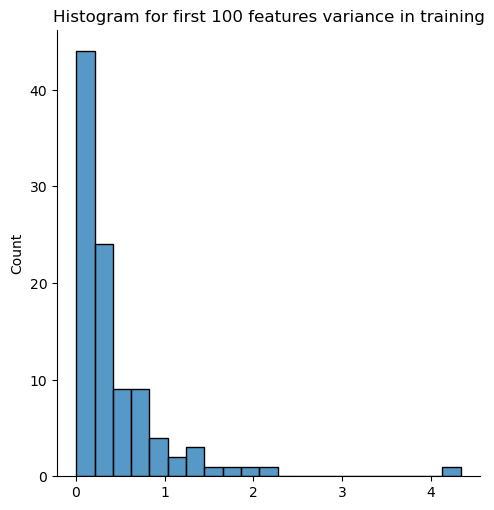

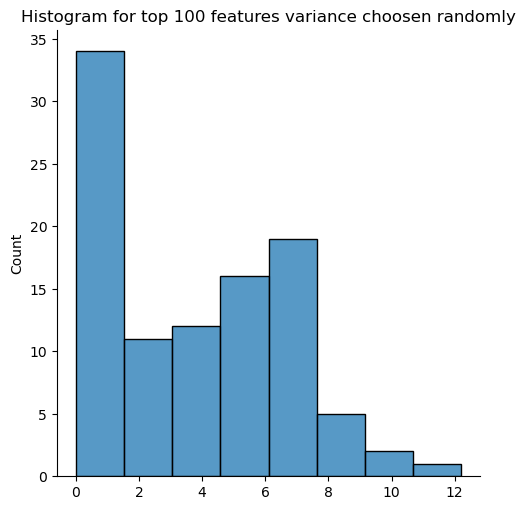

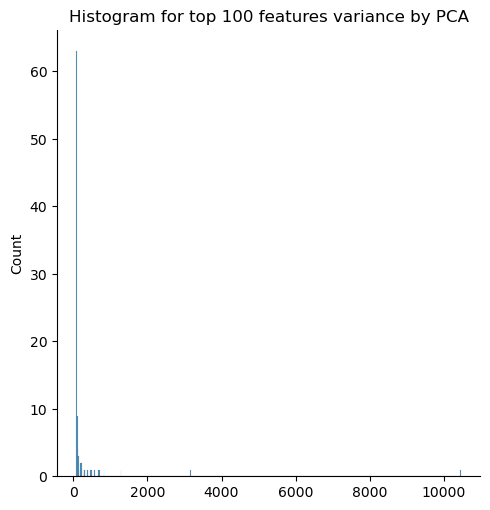

In [8]:
import seaborn as sns

histog = np.var(X_train[:,:100], axis=0)
histogramRandom = np.var(rnd_X_train[:,:100], axis=0)
histogram_high_variance = np.var(pca_X_train[:,:100], axis=0)


sns.displot(histog, kind='hist')
plt.title("Histogram for first 100 features variance in training")
print("Histogram for first 100 features variance in training")

sns.displot(histogramRandom, kind='hist')
plt.title("Histogram for top 100 features variance choosen randomly")
print("Histogram for top 100 features variance choosen randomly")

sns.displot(histogram_high_variance, kind='hist')
plt.title("Histogram for top 100 features variance by PCA")
print("Histogram for top 100 features variance by PCA")